# Matplotlib with DS9 regions

https://pyregion.readthedocs.io/en/latest/index.html


In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import matplotlib.ticker                         # here's where the formatter is
import pyregion
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from astropy.io import fits
import pyregion
from pyregion.mpl_helper import properties_func_default

In [43]:
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'


In [44]:
def fixed_color(shape, saved_attrs):
    attr_list, attr_dict = saved_attrs
    attr_dict["color"] = "red"
    kwargs = properties_func_default(shape, (attr_list, attr_dict))

    return kwargs

In [45]:
filename="../data/2021_02_17/holo4_003_NGC4755_2021-02-17_350_noheader_cut.fits"

In [54]:
# region_name = "ds9.reg"
# r = pyregion.open(region_name)

In [46]:
region = """
image
circle(1000, 1000, 500)
box(200, 600, 200, 600, 0)
"""

In [47]:
hdu=fits.open(filename)

In [48]:
hdu.info()

Filename: ../data/2021_02_17/holo4_003_NGC4755_2021-02-17_350_noheader_cut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (4608, 4000)   float32   


In [49]:
image=hdu[0].data

In [50]:
r = pyregion.parse(region).as_imagecoord(hdu[0].header)
patch_list, artist_list = r.get_mpl_patches_texts(fixed_color)

In [61]:
r[0]

Shape : circle ( Number(1000),Number(1000),Number(500) )

In [62]:
r[1]

Shape : box ( Number(200),Number(600),Number(200),Number(600),Number(0) )

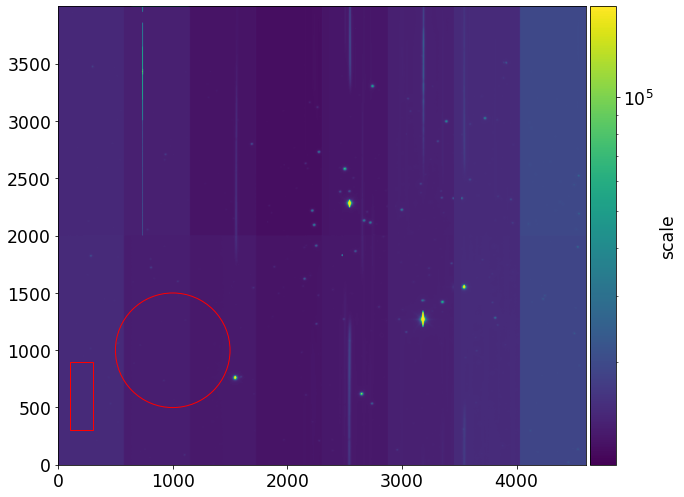

In [51]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im=ax.imshow(image,origin="lower",norm=LogNorm())

cbar=fig.colorbar(im,cax=cax)

cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('scale', rotation=90)


for p in patch_list:
    ax.add_patch(p)
for t in artist_list:
    ax.add_artist(t)
